In [1]:
import pandas as pd

In [2]:
data=pd.read_csv('Admission_Predict.csv')

In [3]:
data


,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
395,396,324,110,3,3.5,3.5,9.04,1,0.82
396,397,325,107,3,3.0,3.5,9.11,1,0.84
397,398,330,116,4,5.0,4.5,9.45,1,0.91
398,399,312,103,3,3.5,4.0,8.78,0,0.67


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         400 non-null    int64  
 1   GRE Score          400 non-null    int64  
 2   TOEFL Score        400 non-null    int64  
 3   University Rating  400 non-null    int64  
 4   SOP                400 non-null    float64
 5   LOR                400 non-null    float64
 6   CGPA               400 non-null    float64
 7   Research           400 non-null    int64  
 8   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 28.3 KB


In [5]:
data.isnull().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [6]:
data.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,200.500000,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,115.614301,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,100.750000,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,200.500000,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,300.250000,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,400.000000,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


# Dropping Irrelevent Feature

In [7]:
data.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

In [8]:
data=data.drop('Serial No.',axis=1)

In [9]:
data

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...
395,324,110,3,3.5,3.5,9.04,1,0.82
396,325,107,3,3.0,3.5,9.11,1,0.84
397,330,116,4,5.0,4.5,9.45,1,0.91
398,312,103,3,3.5,4.0,8.78,0,0.67


# Store Feature Metrics in X and Target in y

In [10]:
data.head(1)

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92


In [11]:
print(data.columns)

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research', 'Chance of Admit '],
      dtype='object')


In [12]:
X=data.drop('Chance of Admit ',axis=1)

In [13]:
y=data['Chance of Admit ']

In [14]:
y

0      0.92
1      0.76
2      0.72
3      0.80
4      0.65
       ... 
395    0.82
396    0.84
397    0.91
398    0.67
399    0.95
Name: Chance of Admit , Length: 400, dtype: float64

# Split data into train test split

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=42)

In [17]:
X_train

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
3,322,110,3,3.5,2.5,8.67,1
18,318,110,3,4.0,3.0,8.80,0
202,340,120,5,4.5,4.5,9.91,1
250,320,104,3,3.0,2.5,8.57,1
274,315,100,1,2.0,2.5,7.95,0
...,...,...,...,...,...,...,...
71,336,112,5,5.0,5.0,9.76,1
106,329,111,4,4.5,4.5,9.18,1
270,306,105,2,2.5,3.0,8.22,1
348,302,99,1,2.0,2.0,7.25,0


# Feature Scaling

In [18]:
data.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [19]:
from sklearn.preprocessing import StandardScaler

In [20]:
sc=StandardScaler()

In [21]:
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [22]:
X_test

array([[-1.4057073 , -0.57209936, -0.057308  ,  0.12715607,  0.61348253,
        -0.79612211,  0.92761259],
       [-0.51865083, -0.90435307, -0.057308  ,  1.10763663,  0.61348253,
         0.08881255,  0.92761259],
       [ 2.05381293,  1.0891692 ,  1.6892215 ,  0.61739635,  0.61348253,
         1.72253809,  0.92761259],
       [ 0.72322823,  0.09240806,  0.81595675,  1.10763663,  0.61348253,
         0.80356748,  0.92761259],
       [-1.4057073 , -1.73498736, -0.93057275, -0.36308421, -0.50194025,
        -1.2045535 ,  0.92761259],
       [ 2.05381293,  1.25529606,  1.6892215 ,  1.10763663,  1.17119391,
         1.46726848,  0.92761259],
       [-1.76052989, -1.90111421, -0.93057275, -0.85332449, -2.17507441,
        -1.18753552, -1.07803625],
       [-1.22829601, -1.40273364, -0.057308  , -1.34356476, -1.05965163,
        -1.57894893, -1.07803625],
       [-0.42994518, -0.40597251, -0.93057275, -1.34356476, -1.05965163,
        -0.23452896, -1.07803625],
       [ 0.54581693,  0.9230

# import Model

In [23]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

# Model Training

In [24]:
lr=LinearRegression()
lr.fit(X_train,y_train)

svm=SVR()
svm.fit(X_train,y_train)

rf=RandomForestRegressor()
rf.fit(X_train,y_train)

gr=GradientBoostingRegressor()
gr.fit(X_train,y_train)



GradientBoostingRegressor()

# Predict on Dataset

In [25]:
y_pred1=lr.predict(X_test)
y_pred2=svm.predict(X_test)
y_pred3=rf.predict(X_test)
y_pred4=gr.predict(X_test)

# Evaluate Algorithm

In [26]:
from sklearn import metrics

In [27]:
score1=metrics.r2_score(y_test,y_pred1)
score2=metrics.r2_score(y_test,y_pred2)
score3=metrics.r2_score(y_test,y_pred3)
score4=metrics.r2_score(y_test,y_pred4)

In [28]:
print(score1,score2,score3,score4)

0.8212082591486992 0.7597814848647667 0.8098903621055307 0.7965009319366764


In [31]:
final_data = pd.DataFrame({'Models': ['LR', 'SVM', 'RF', 'GR'], 
                           'R2 Score': [score1, score2, score3, score4]})

In [32]:
final_data

,Models,R2 Score
0,LR,0.821208
1,SVM,0.759781
2,RF,0.809890
3,GR,0.796501


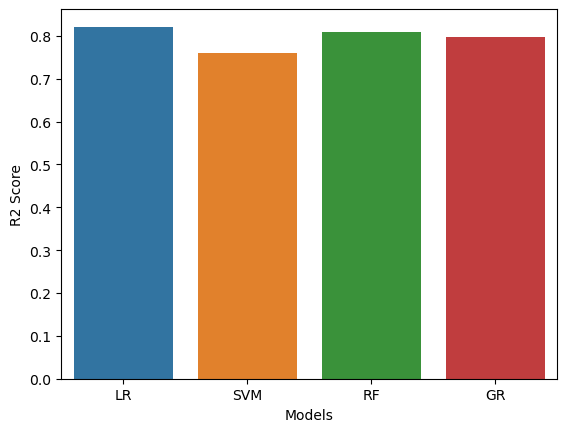

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming final_data is already defined as shown previously
sns.barplot(x='Models', y='R2 Score', data=final_data)
plt.show()

# Classification

In [39]:
data.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [40]:
import numpy as np

In [44]:
y_train=[1 if value>0.8 else 0  for value in y_train]
y_test=[1 if value>0.8 else 0  for value in y_test]
y_train=np.array(y_train)
y_test=np.array(y_test)

In [45]:
y_train

array([0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0,

# import Models

In [58]:
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score

# Model Training & Evaluation

In [59]:
lr=LogisticRegression()
lr.fit(X_train,y_train)
y_pred1=lr.predict(X_test)
print(accuracy_score(y_test,y_pred1))

0.925


In [61]:
svm_model = SVC()
svm_model.fit(X_train, y_train)
y_pred2 = svm_model.predict(X_test)
print(accuracy_score(y_test,y_pred2))

0.925


In [63]:
kn=KNeighborsClassifier()
kn.fit(X_train, y_train)
y_pred3 = kn.predict(X_test)
print(accuracy_score(y_test,y_pred3))

0.8875


In [65]:
rf=RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred4 = rf.predict(X_test)
print(accuracy_score(y_test,y_pred4))

0.9375


In [66]:
gbc=GradientBoostingClassifier()
gbc.fit(X_train, y_train)
y_pred5 = gbc.predict(X_test)
print(accuracy_score(y_test,y_pred5))

0.975


In [67]:
final_data = pd.DataFrame({'Models': ['LR', 'SVC', 'KNN','RF', 'GBC'], 
                           'Accuracy_Score': [accuracy_score(y_test,y_pred1),
                                             accuracy_score(y_test,y_pred2),
                                             accuracy_score(y_test,y_pred3),
                                             accuracy_score(y_test,y_pred4),
                                             accuracy_score(y_test,y_pred5)]})

In [68]:
final_data

,Models,Accuracy_Score
0,LR,0.9250
1,SVC,0.9250
2,KNN,0.8875
3,RF,0.9375
4,GBC,0.9750


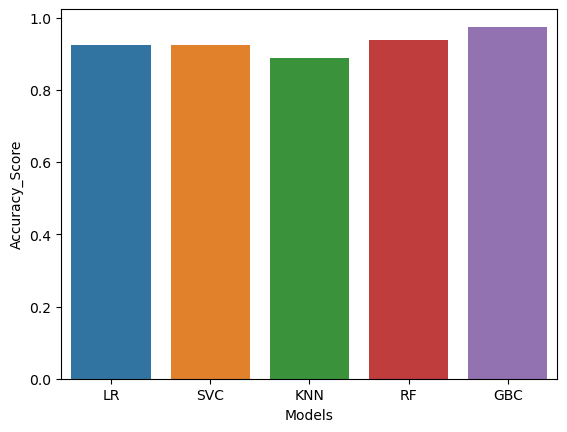

In [69]:
sns.barplot(x='Models', y='Accuracy_Score', data=final_data)
plt.show()